In [2]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
os.getcwd()

'D:\\GitHub\\Algorithms---Python\\Tensorflow 2.0\\100days challenge\\notebooks'

In [5]:
os.chdir('../data')

In [33]:
rawData = pd.read_csv('breast_cancer.csv',header=0)
rawData.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [34]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [35]:
# id and unnamed: 32 are unuseful here. so we will drop them
rawData = rawData.drop(['id','Unnamed: 32'],axis=1)
rawData.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [39]:
map = {'M':1,'B':0}
rawData['diagnosis'].replace(map,inplace=True)

In [41]:
rawData.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

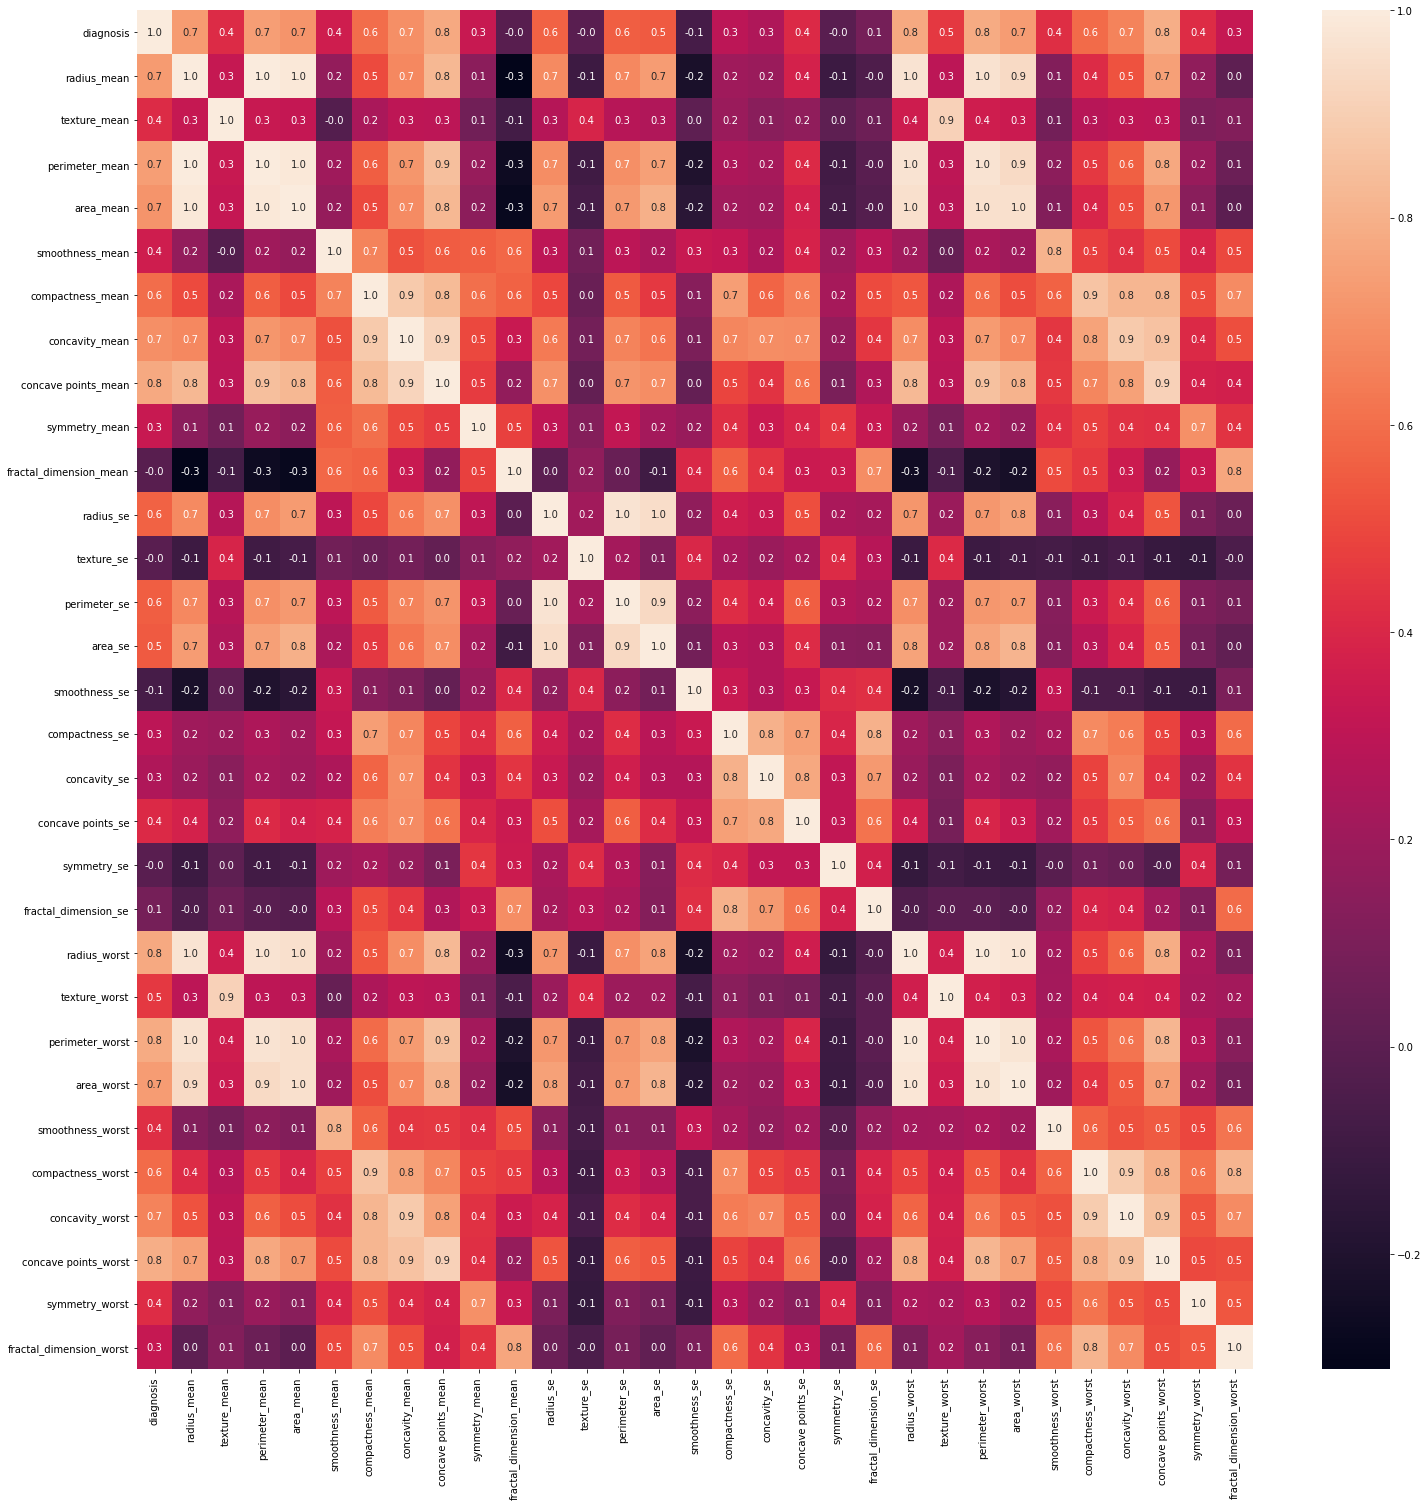

In [42]:
columns = list(rawData.columns)
columns.remove('diagnosis')
plt.figure(figsize=(25,25))
sns.heatmap(rawData.corr(),fmt= '.1f',annot=True)

In [43]:
#radius_mean is correlated with area_worst,perimeter_worst,radius_worst,area_mean,perimeter_mean
#texture_mean is correlated with texture_worst
#smoothness_mean is correlated with smoothness_worst
#compactness_mean is correlated with concave ponts_worst,concavity_worst,compactness_worst,cocativity_mean
#radis_se is correlated with area_se,perimeter_Se
#and continue

In [44]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train, x_test, y_train, y_test = train_test_split(rawData[columns], rawData['diagnosis'], test_size=0.3, random_state=42)

In [54]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selected_feature = SelectKBest(chi2,k=7).fit(x_train,y_train)

x_train_selected = selected_feature.transform(x_train)
x_test_selected = selected_feature.transform(x_test)

In [55]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(7,)),
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
	tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

In [58]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

os.chdir('../models/')
model_path = 'day-1/day1.ckpt'
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=model_path,save_weights_only=True,verbose=1)


model.fit(x_train_selected, y_train, epochs=50, batch_size=1,callbacks=[cp_callback])
test_loss, test_acc = model.evaluate(x_test_selected, y_test)

Epoch 1/50
378/398 [===========================>..] - ETA: 0s - loss: 0.2913 - accuracy: 0.8968
Epoch 00001: saving model to day-1/day1.ckpt
398/398 [==============================] - 1s 3ms/step - loss: 0.2823 - accuracy: 0.9020
Epoch 2/50
372/398 [===========================>..] - ETA: 0s - loss: 0.2615 - accuracy: 0.8925
Epoch 00002: saving model to day-1/day1.ckpt
398/398 [==============================] - 1s 3ms/step - loss: 0.2519 - accuracy: 0.8970
Epoch 3/50
388/398 [============================>.] - ETA: 0s - loss: 0.2121 - accuracy: 0.9098
Epoch 00003: saving model to day-1/day1.ckpt
398/398 [==============================] - 1s 4ms/step - loss: 0.2201 - accuracy: 0.9045
Epoch 4/50
396/398 [============================>.] - ETA: 0s - loss: 0.2378 - accuracy: 0.9141
Epoch 00004: saving model to day-1/day1.ckpt
398/398 [==============================] - 1s 4ms/step - loss: 0.2370 - accuracy: 0.9146
Epoch 5/50
383/398 [===========================>..] - ETA: 0s - loss: 0.2543 - a

398/398 [==============================] - 1s 4ms/step - loss: 0.2188 - accuracy: 0.9095
Epoch 37/50
392/398 [============================>.] - ETA: 0s - loss: 0.2165 - accuracy: 0.9158
Epoch 00037: saving model to day-1/day1.ckpt
398/398 [==============================] - 2s 5ms/step - loss: 0.2156 - accuracy: 0.9146
Epoch 38/50
391/398 [============================>.] - ETA: 0s - loss: 0.2201 - accuracy: 0.9130
Epoch 00038: saving model to day-1/day1.ckpt
398/398 [==============================] - 2s 4ms/step - loss: 0.2234 - accuracy: 0.9121
Epoch 39/50
380/398 [===========================>..] - ETA: 0s - loss: 0.2222 - accuracy: 0.9184
Epoch 00039: saving model to day-1/day1.ckpt
398/398 [==============================] - 2s 4ms/step - loss: 0.2163 - accuracy: 0.9221
Epoch 40/50
387/398 [============================>.] - ETA: 0s - loss: 0.2146 - accuracy: 0.9251
Epoch 00040: saving model to day-1/day1.ckpt
398/398 [==============================] - 1s 2ms/step - loss: 0.2218 - accu

In [59]:
test_loss, test_acc

(0.12388647347688675, 0.9415204524993896)